***
#TensorFlow: Powerhouse for Building Neural Networks
***
Authors : `Kamal Seriki` | `Ridwan Amokun`


`TensorFlow` is an open-source software library developed by Google for numerical computation using dataflow graphs. In simpler terms, it's a toolkit that lets you build and train complex models, especially neural networks, for various tasks like image recognition, language translation, and even self-driving cars!

Think of a neural network as a web of interconnected neurons, mimicking the human brain. Each neuron receives information from others, processes it, and transmits its own output. Similarly, in TensorFlow, you create layers of these `artificial neurons` connected mathematically and train them on data to learn and make predictions.

Here we obtain a dataset for energy connections in Netherland and we would predict type of connection just to have a feel of what Multi-Class Classification with is like with `Feed-Foward Neural Network`

In [ ]:
#!pip install tensorflow

In [ ]:
#importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras import regularizers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
random_state = 12

import warnings
warnings.filterwarnings('ignore')

2.15.0


***
# Exploratory Data Analysis & Data Preprocessing
***

># Data: Energy consumption of the Netherlands

Electricity and Gas consumed in the Netherlands every year

The columns in the data are described as follows:

- `net_manager`: code of the regional network manager<br>
- `purchase_area`: code of the area where the energy is purchased<br>
- `street`: Name of the street<br>
- `zipcode_from` and `zipcode_to`: 2 columns for the range of zipcodes covered, 4 numbers and 2 letters<br>
- `city`: Name of the city<br>
- `num_connections`: Number of connections in the range of zipcodes<br>
- `delivery_perc`: percentage of the net consumption of electricity or gas. The lower, the more energy was given back to the grid (for example if you have solar panels)<br>
- `perc_of_active_connections`: Percentage of active connections in the zipcode range<br>
- `type_of_connection`: principal type of connection in the zipcode range. For electricity is # fuses X # ampère. For gas is G4, G6, G10, G16, G25<br>
- `type_conn_perc`: percentage of presence of the principal type of connection in the zipcode range<br>
- `annual_consume`: Annual consume. Kwh for electricity, m3 for gas<br>
- `annual_consume_lowtarif_perc`: Percentage of consume during the low tarif hours. From 10 p.m. to 7 a.m. and during weekends.<br>
- `smartmeter_perc`: percentage of smartmeters in the zipcode ranges

`Data source`: https://www.kaggle.com/datasets/lucabasa/dutch-energy

In [ ]:
df1 = pd.read_csv('/content/endinet_gas_01012014.csv')
df2 = pd.read_csv('/content/endurisgas_01012016.csv')
df3 = pd.read_csv('/content/coteq_electricity_2015.csv')
df = pd.concat([df1, df2, df3])

In [ ]:
df.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Endinet regio Eindhoven BV,871718518003011971,de Wieken,0000AA,0000AA,VELDHOVEN,11.0,100.0,100.0,91,G4,1647,0.0,0.0
1,Endinet regio Eindhoven BV,871718518003011971,Oirschotsebaan,5062TG,5091AB,OISTERWIJK,28.0,100.0,100.0,96,G4,1810,0.0,4.0
2,Endinet regio Eindhoven BV,871718518003011971,Margrietstraat,5091AC,5091AC,OOST WEST EN MIDDELBEERS,21.0,100.0,95.0,67,G4,1605,0.0,5.0
3,Endinet regio Eindhoven BV,871718518003011971,Margrietstraat,5091AD,5091AD,OOST WEST EN MIDDELBEERS,14.0,100.0,100.0,100,G4,1203,0.0,0.0
4,Endinet regio Eindhoven BV,871718518003011971,Margrietstraat,5091AE,5091AE,OOST WEST EN MIDDELBEERS,19.0,100.0,100.0,74,G4,1784,0.0,0.0


In [ ]:
df.columns

Index(['net_manager', 'purchase_area', 'street', 'zipcode_from', 'zipcode_to',
       'city', 'num_connections', 'delivery_perc',
       'perc_of_active_connections', 'type_conn_perc', 'type_of_connection',
       'annual_consume', 'annual_consume_lowtarif_perc', 'smartmeter_perc'],
      dtype='object')

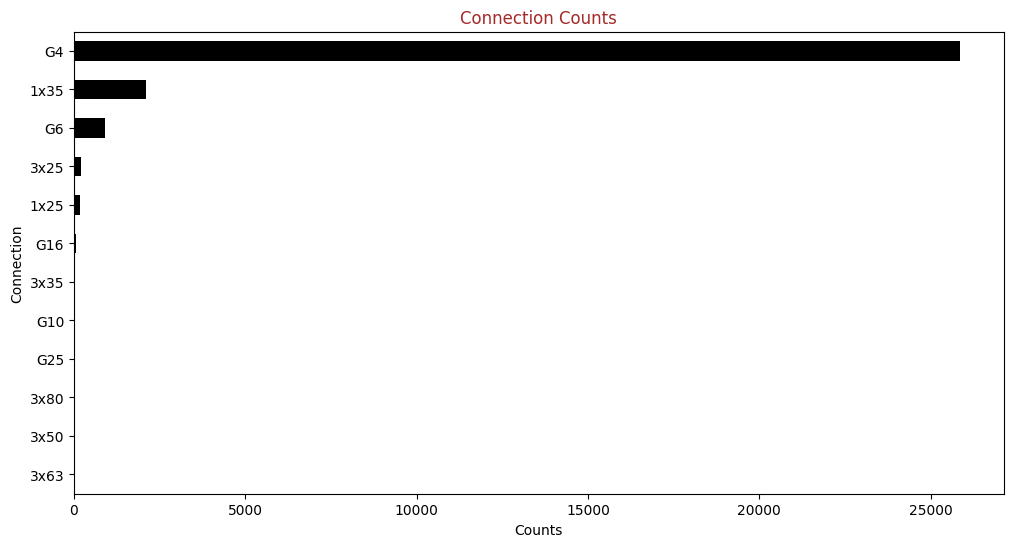

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
df.type_of_connection.value_counts(ascending=True).plot(kind="barh", color="black")
plt.ylabel("Connection")
plt.xlabel("Counts")
plt.title("Connection Counts", color="brown")
plt.show()

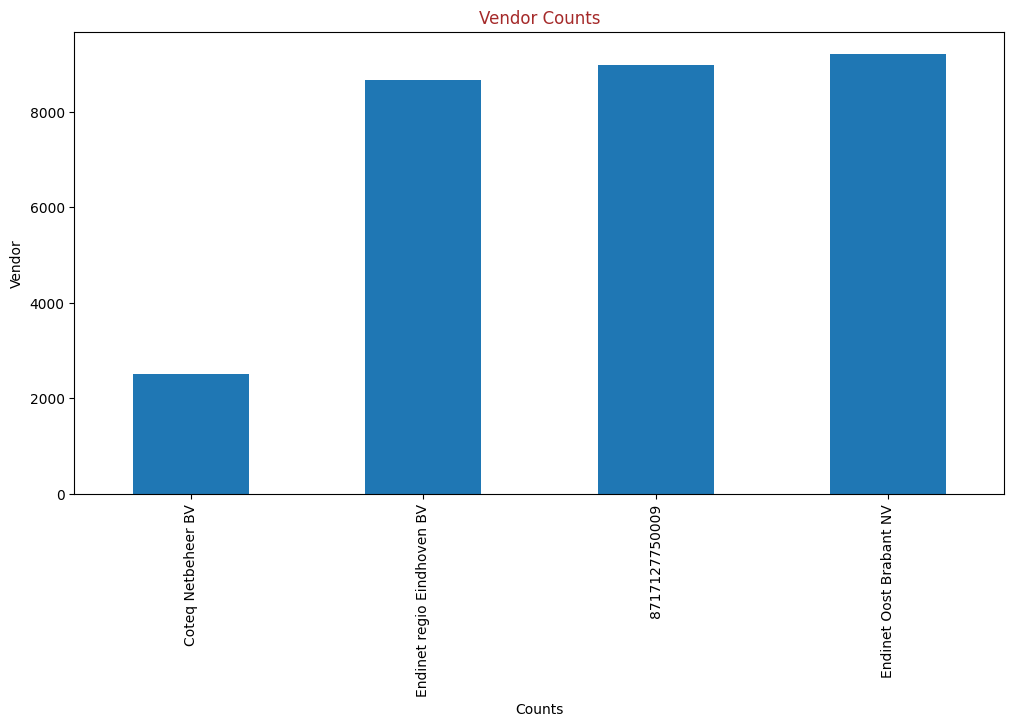

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
df.net_manager.value_counts(ascending=True).plot(kind="bar")
plt.ylabel("Vendor")
plt.xlabel("Counts")
plt.title("Vendor Counts", color="brown")
plt.show()

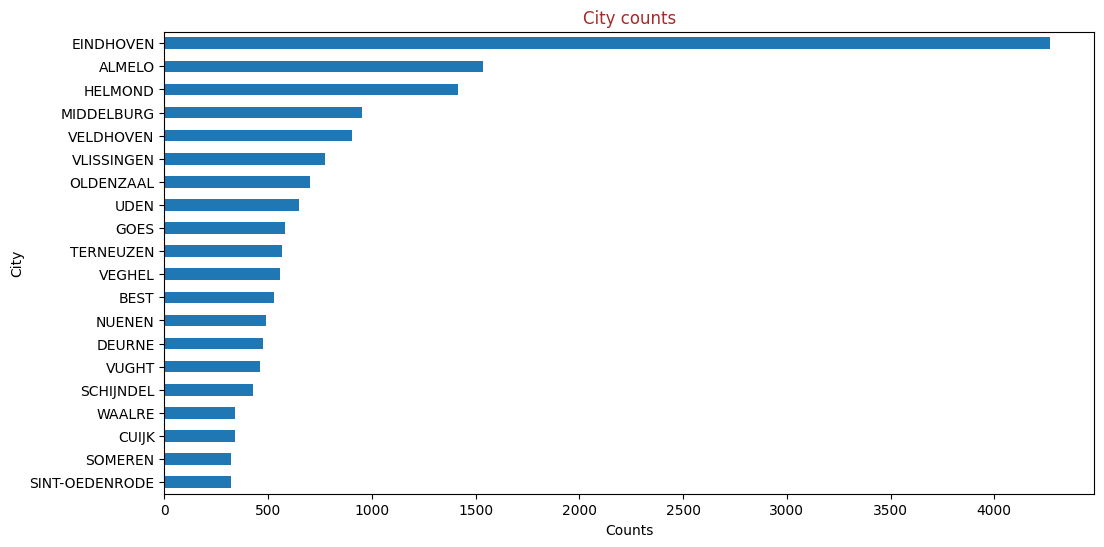

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
df.city.value_counts(ascending=True).tail(20).plot(kind="barh")
plt.ylabel("City")
plt.xlabel("Counts")
plt.title("City counts", color="brown")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29338 entries, 0 to 2502
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   net_manager                   29338 non-null  object 
 1   purchase_area                 29338 non-null  object 
 2   street                        29338 non-null  object 
 3   zipcode_from                  29338 non-null  object 
 4   zipcode_to                    29338 non-null  object 
 5   city                          29338 non-null  object 
 6   num_connections               29338 non-null  float64
 7   delivery_perc                 29338 non-null  float64
 8   perc_of_active_connections    29338 non-null  float64
 9   type_conn_perc                29338 non-null  object 
 10  type_of_connection            29338 non-null  object 
 11  annual_consume                29338 non-null  int64  
 12  annual_consume_lowtarif_perc  29338 non-null  float64
 13  sm

In [ ]:
df.dropna(inplace=True)

In [ ]:
num_col = df.select_dtypes([int, float]).columns
cat_col = df.select_dtypes([object]).columns
len(num_col), len(cat_col)

(6, 8)

Lets check the distribution of the categorical column using the show distribution function

In [ ]:
def show_distribution(data, col):
        data = data.copy()
        col = str(col)

        mean = round(data[col].mean(), 4)
        std = round(data[col].std(), 4)
        mode = round(data[col].mode()[0], 4)
        var = round(np.sqrt(data[col].std()), 4)
        print("The mathemiocal distribution of the data are presented as follows: ")
        print(f"Mean:{mean} \nMode:{mode} \nStandard Deviation:{std} \nVariance:{var}")

        fig, ax = plt.subplots(1, 2, figsize=(10, 6))
        sns.histplot(data[col], ax=ax[0], binwidth=1, color="black")
        ax[0].axvline(mean, linewidth=2, linestyle="--", color="red", label="mean")
        ax[0].axvline(mode, linewidth=1, linestyle="--", color="orange", label="mode")
        ax[0].axvline(std, linewidth=1, linestyle="--", color="white", label="standard deviation")
        ax[0].axvline(var, linewidth=1, linestyle="--", color="yellow", label="standard deviation")
        ax[0].set_title(f"Distribution Plot for {col}", color="brown")

        sns.boxplot(y=data[col], ax=ax[1], width=0.5, color="black")
        ax[1].axhline(mean, linewidth=2, linestyle="--", color="red", label="mean")
        ax[1].axhline(mode, linewidth=1, linestyle="--", color="orange", label="mode")
        ax[1].axhline(std, linewidth=1, linestyle="--", color="white", label="standard deviation")
        ax[1].axhline(var, linewidth=1, linestyle="--", color="yellow", label="standard deviation")
        ax[1].set_title(f"Boxplot for {col}", color="brown")
        plt.show()

The mathemiocal distribution of the data are presented as follows: 
Mean:22.1172 
Mode:16.0 
Standard Deviation:12.3174 
Variance:3.5096


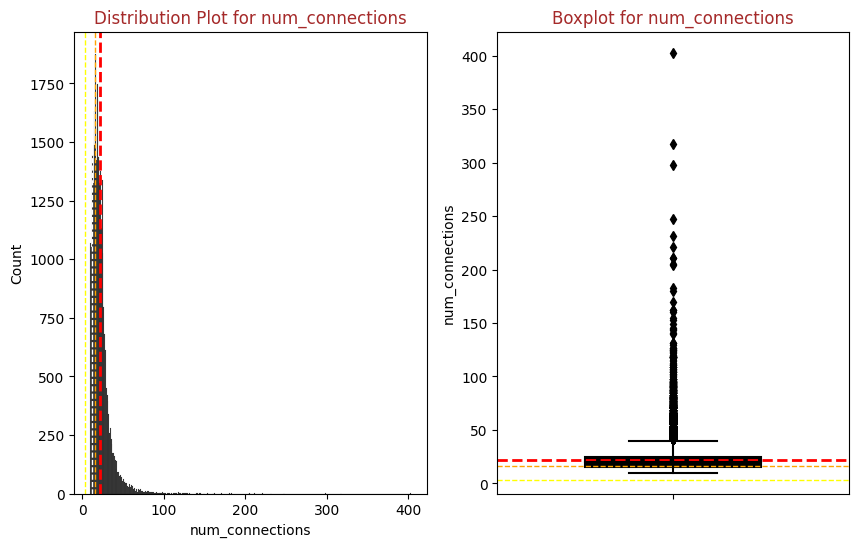

The mathemiocal distribution of the data are presented as follows: 
Mean:99.584 
Mode:100.0 
Standard Deviation:2.7274 
Variance:1.6515


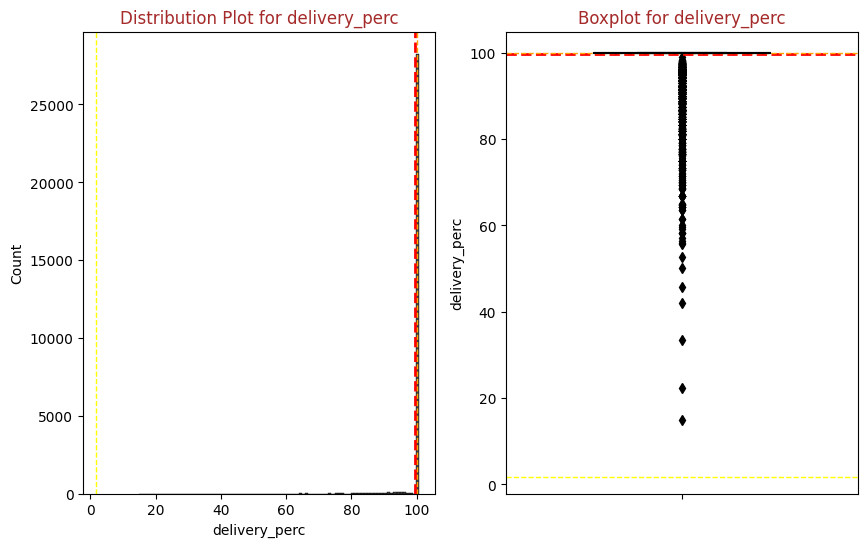

The mathemiocal distribution of the data are presented as follows: 
Mean:98.6958 
Mode:100.0 
Standard Deviation:6.1111 
Variance:2.4721


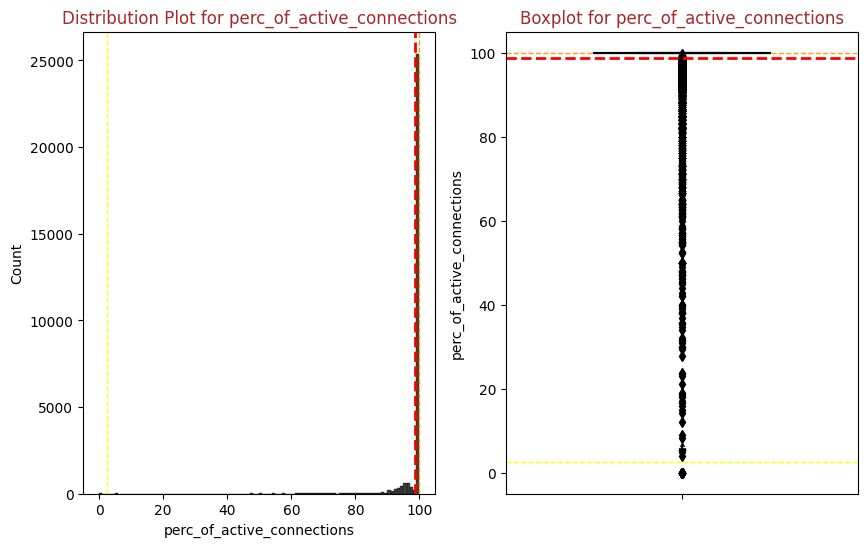

The mathemiocal distribution of the data are presented as follows: 
Mean:2103.5677 
Mode:1531 
Standard Deviation:1530.2378 
Variance:39.1183


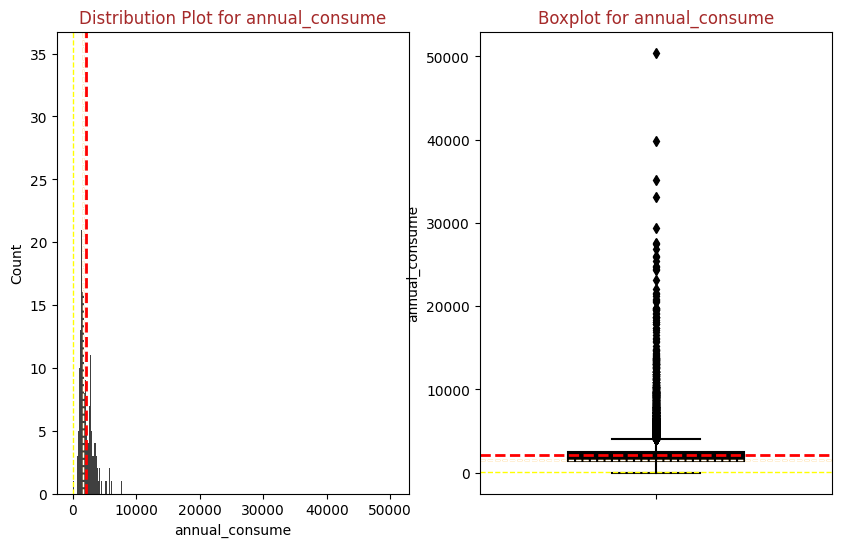

The mathemiocal distribution of the data are presented as follows: 
Mean:7.4488 
Mode:0.0 
Standard Deviation:24.8435 
Variance:4.9843


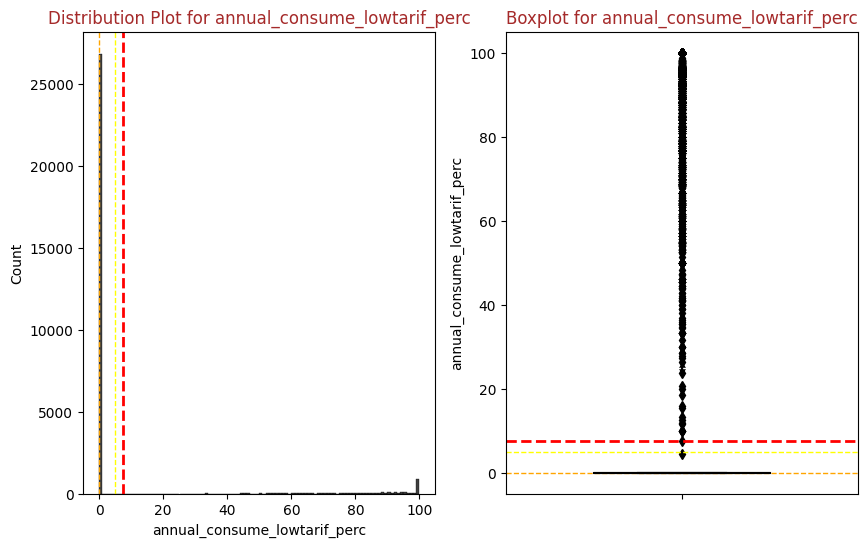

The mathemiocal distribution of the data are presented as follows: 
Mean:11.0485 
Mode:0.0 
Standard Deviation:17.8578 
Variance:4.2258


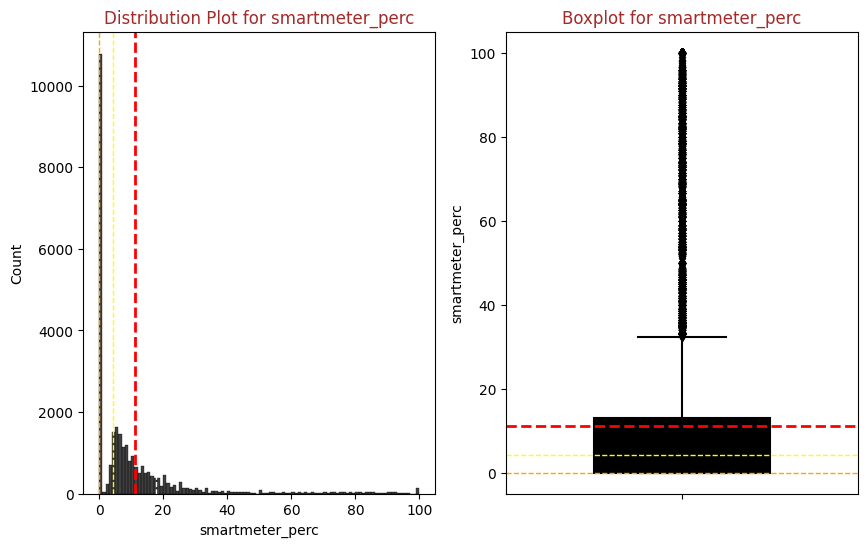

In [ ]:
for col in num_col:
  show_distribution(df, col)

In [ ]:
for col in cat_col:
  uniq = df[col].nunique()
  print(f"{col}:{uniq}")

net_manager:4
purchase_area:27
street:13502
zipcode_from:29338
zipcode_to:29338
city:251
type_conn_perc:450
type_of_connection:12


In [ ]:
df.type_of_connection.unique()

array(['G4', 'G6', 'G10', 'G16', 'G25', '1x35', '3x25', '1x25', '3x63',
       '3x50', '3x35', '3x80'], dtype=object)

In [ ]:
ignore = ['zipcode_from', 'zipcode_to', 'street', 'type_of_connection']

# List of categorical columns to be one-hot encoded
cat_columns_to_encode = [col for col in df.columns if col in cat_col and col not in ignore]

# Perform one-hot encoding
for col in cat_columns_to_encode:
    df = pd.get_dummies(df, columns=[col])

In [ ]:
cat_columns_to_encode

['net_manager', 'purchase_area', 'city', 'type_conn_perc']

In [ ]:
df.columns

Index(['street', 'zipcode_from', 'zipcode_to', 'num_connections',
       'delivery_perc', 'perc_of_active_connections', 'type_of_connection',
       'annual_consume', 'annual_consume_lowtarif_perc', 'smartmeter_perc',
       ...
       'type_conn_perc_98,77', 'type_conn_perc_98,78', 'type_conn_perc_98,90',
       'type_conn_perc_98,92', 'type_conn_perc_98,95', 'type_conn_perc_98,97',
       'type_conn_perc_99,15', 'type_conn_perc_99,29', 'type_conn_perc_99,41',
       'type_conn_perc_99,53'],
      dtype='object', length=742)

In [ ]:
df['type_of_connection'] = pd.factorize(df['type_of_connection'])[0]

****
# Model Building

In [ ]:
target = 'type_of_connection'
X = df.drop(columns=ignore)
y = df[target]

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

#split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=random_state)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (21123, 738) (21123,)
Validation set shape: (2347, 738) (2347,)
Testing set shape: (5868, 738) (5868,)


***
>## Layer Selection
****
Selecting the number of inputs for a layer in a neural network depends on the nature of your data and the specific problem you are trying to solve. The number of inputs for a layer is determined by the number of features (variables) in your dataset. The following general guidelines for layer selection:

****
Input Layer:
****

The input layer of your neural network should have neurons equal to the number of features in your dataset.
In this case

The number of neurons in the hidden layers is often a hyperparameter that you can tune.
The architecture of the hidden layers depends on the complexity of the relationships in your data.
You may need to experiment with different architectures to find the best one for your specific problem.

****
Output Layer:
****

The number of neurons in the output layer depends on the type of problem you are solving.
For binary classification, you one neuron with a sigmoid activation function.
For multi-class classification, the number of neurons equals the number of classes, and you use softmax activation.
For regression problems, the output layer may have a single neuron (for a single output) or more depending on the number of output variables.

In [ ]:
input_dim = X.shape[1]
num_classes = df.type_of_connection.nunique()

# Assuming y_train and y_val are integer class labels
y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_val_categorical = to_categorical(y_val, num_classes=num_classes)

# Create a Sequential model
model1 = Sequential([
    Dense(units=512, input_dim=input_dim, activation='relu'),
    Dense(units=84, activation="relu"),
    Dense(units=42, activation="relu"),
    Dense(units=num_classes, activation="softmax")  # Use softmax for multi-class
])

# Compile the model
model1.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])


***
># Fitting the data on the Predefined Architecture
***
Next we fit our model on the training<br>
`model.fit` Function
The fit method in Keras is used to train a model on a given dataset. It takes several important parameters that control the training process.

`x_train`: The input data for training. This is typically a NumPy array or a TensorFlow tensor containing the features of your training dataset.

`y_train`: The target (labels) for the training data. This is also a NumPy array or a TensorFlow tensor containing the corresponding labels for x_train.

`epochs`: The number of epochs represents how many times the entire training dataset is passed forward and backward through the neural network. One epoch is one complete pass through the entire training dataset.

  `validation_data`: A tuple (x_val, y_val) representing the validation dataset. This dataset is not used for training but is used to evaluate the model's performance on data it hasn't seen during training. It helps in monitoring whether the model is overfitting or underfitting.



In [ ]:
model1.fit(X_train, y_train_categorical, epochs=5)

Epoch 1/5
661/661 [==============================] - 8s 7ms/step - loss: 1.4264 - accuracy: 0.9091
Epoch 2/5
661/661 [==============================] - 4s 5ms/step - loss: 0.4441 - accuracy: 0.9334
Epoch 3/5
661/661 [==============================] - 3s 4ms/step - loss: 0.3065 - accuracy: 0.9403
Epoch 4/5
661/661 [==============================] - 3s 4ms/step - loss: 0.2349 - accuracy: 0.9467
Epoch 5/5
661/661 [==============================] - 3s 4ms/step - loss: 0.2169 - accuracy: 0.9472


In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               378368    
                                                                 
 dense_1 (Dense)             (None, 84)                43092     
                                                                 
 dense_2 (Dense)             (None, 42)                3570      
                                                                 
 dense_3 (Dense)             (None, 12)                516       
                                                                 
Total params: 425546 (1.62 MB)
Trainable params: 425546 (1.62 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


A more comprehensive approach but would only make sense with enough data !

In [ ]:
input_size = X.shape[1]

model2 = Sequential([
    Dense(units=500, activation="relu", input_shape=(input_size,)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=250, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=50, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=21, activation="softmax")  # Use "softmax" for multiclass classification
])

optimizer = Adam(learning_rate=0.001)

model2.compile(optimizer=optimizer,
              loss='categorical_crossentropy',  # Use categorical crossentropy for multiclass classification
              metrics=['accuracy'])

model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               369500    
                                                                 
 batch_normalization (Batch  (None, 500)               2000      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 250)               125250    
                                                                 
 batch_normalization_1 (Bat  (None, 250)               1000      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 250)              

***
># Model Evaluation
***
To evaluate the model using the model.evaluate function<br>
`model.evaluate Function`:
The evaluate method in Keras is used to evaluate the model on a specified dataset. It takes the following parameters:

`x_test`: The input data for testing. This is typically a NumPy array or a TensorFlow tensor containing the features of your test dataset.

`y_test`: The target (labels) for the test data. This is also a NumPy array or a TensorFlow tensor containing the corresponding labels for x_test.

Epoch 1/15
661/661 [==============================] - 3s 4ms/step - loss: 0.1757 - accuracy: 0.9504 - val_loss: 0.1611 - val_accuracy: 0.9540
Epoch 2/15
661/661 [==============================] - 3s 4ms/step - loss: 0.1677 - accuracy: 0.9512 - val_loss: 0.1529 - val_accuracy: 0.9540
Epoch 3/15
661/661 [==============================] - 3s 4ms/step - loss: 0.1690 - accuracy: 0.9505 - val_loss: 0.1523 - val_accuracy: 0.9540
Epoch 4/15
661/661 [==============================] - 4s 5ms/step - loss: 0.1584 - accuracy: 0.9515 - val_loss: 0.1503 - val_accuracy: 0.9540
Epoch 5/15
661/661 [==============================] - 3s 4ms/step - loss: 0.1603 - accuracy: 0.9517 - val_loss: 0.1557 - val_accuracy: 0.9540
Epoch 6/15
661/661 [==============================] - 3s 4ms/step - loss: 0.1596 - accuracy: 0.9517 - val_loss: 0.1482 - val_accuracy: 0.9548
Epoch 7/15
661/661 [==============================] - 3s 4ms/step - loss: 0.1615 - accuracy: 0.9515 - val_loss: 0.1483 - val_accuracy: 0.9544
Epoch 

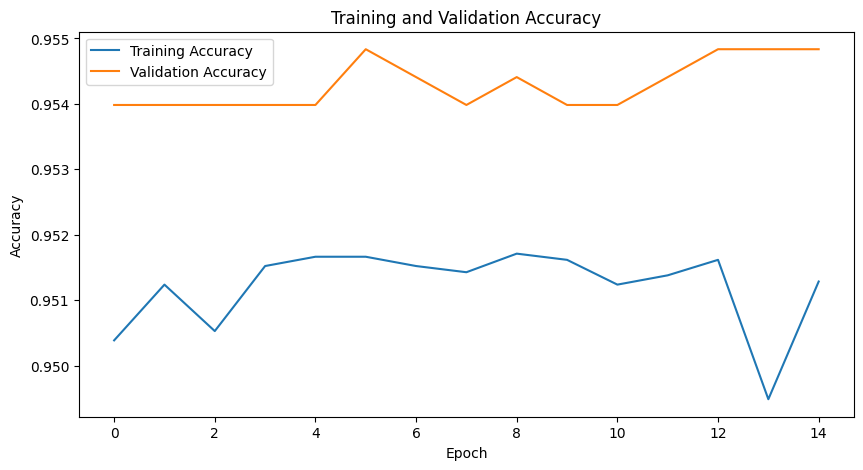

In [ ]:
history = model1.fit(X_train, y_train_categorical, epochs=15, validation_data=(X_val, y_val_categorical))

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


># Observations:
***

- Both training and validation accuracy increase steadily over the entire training period of 15 epochs. This is a positive sign, indicating that the model is learning from the training data and improving its ability to make accurate predictions.
- The training accuracy remains consistently higher than the validation accuracy. This is common in neural network training, as the model may memorize the training data but not generalize well to unseen data.
- The gap between the two lines is relatively small, especially later in the training process. This suggests that the model is not significantly overfitting the training data, which is good news for its performance on unseen data.
- Both lines appear to plateauing slightly towards the end, potentially indicating that the model is approaching its optimal performance with the current settings.

****
# Conclusion
****
Launching a neural network to aid processes is like introducing a digital maestro to unravel data mysteries. Crafting its architecture, featuring activation functions, normalization, and dropout layers, is akin to dressing our digital maestro in cutting-edge tech attire. 🧠✨
#Thank you !!!

# References
`Luca Basanisi` (2020). 'Energy consumption of the Netherlands' https://www.kaggle.com/datasets/lucabasa/dutch-energy